In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestCentroid
from time import time
from sklearn.model_selection import GridSearchCV


In [10]:
df = pd.read_csv('covtype.data')

C:\Users\grech\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


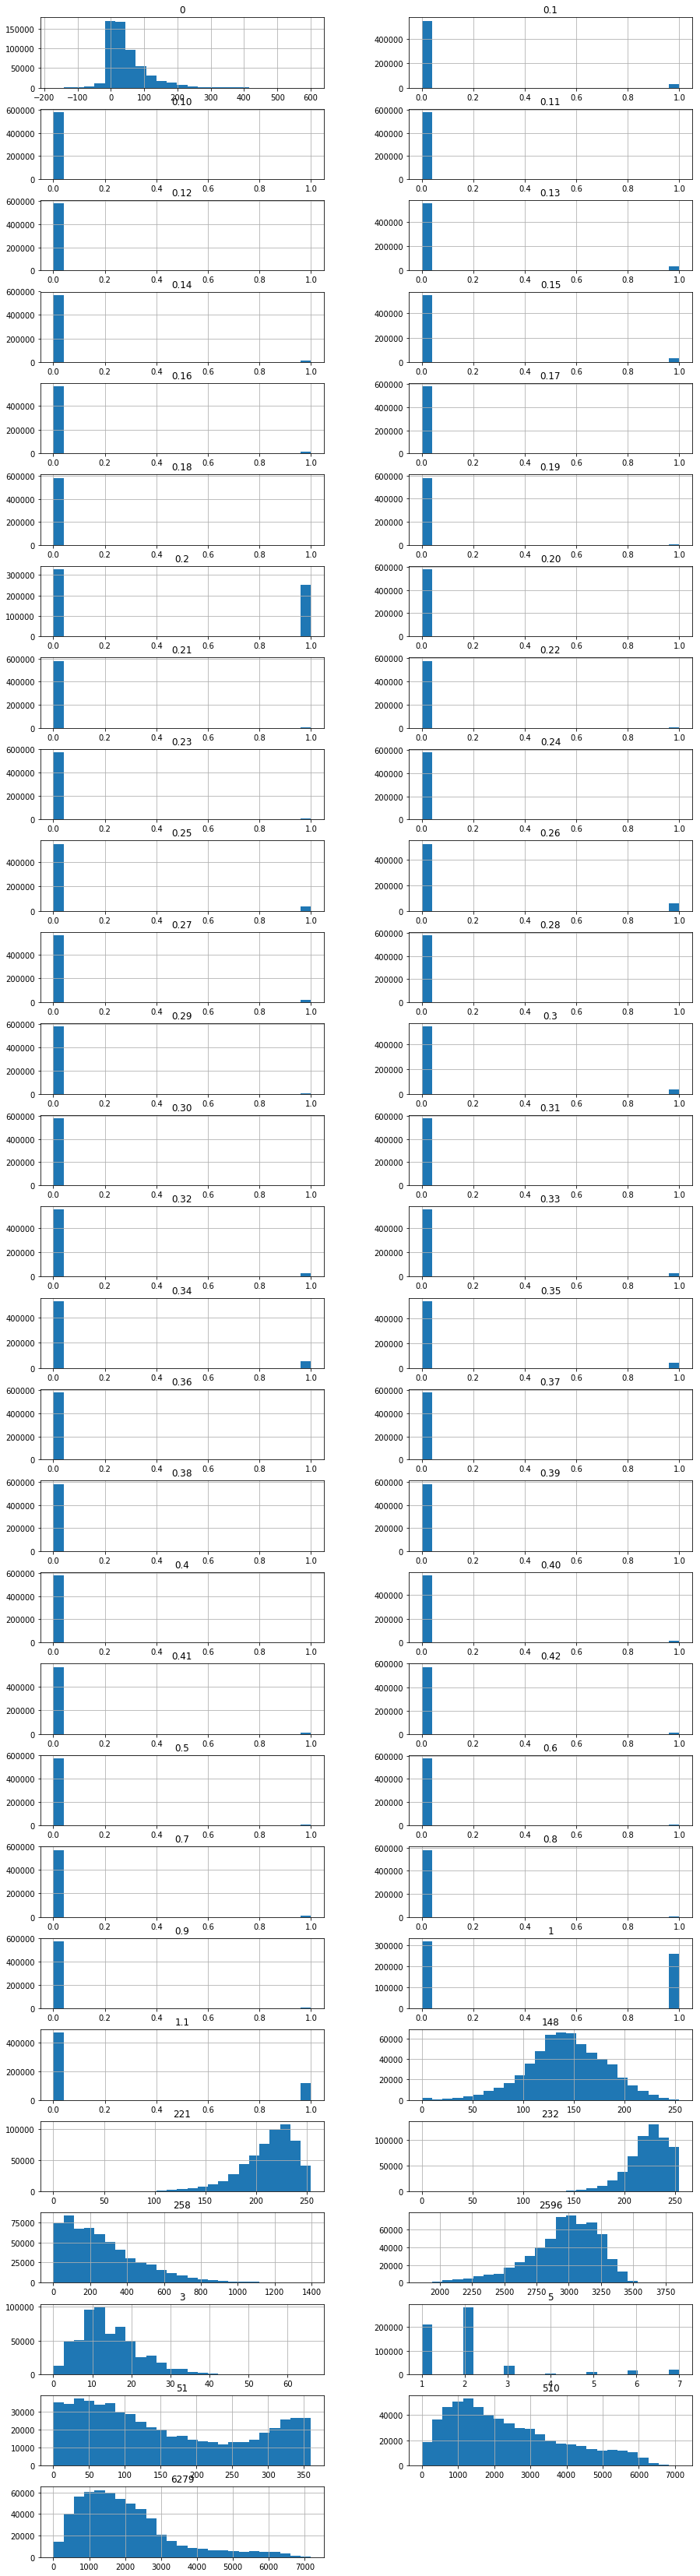

In [11]:
fig = plt.figure(figsize = (15,60))
ax = fig.gca()
df.hist(ax = ax, bins = 25, layout=(-1, 2))
plt.show()

In [12]:
y_all = df.pop('5').values
X_all = df.values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.33, 
                                                    random_state = 5, stratify = y_all)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_all, y_all, test_size = 0.33, 
                                                    random_state = 5, shuffle = True)

In [22]:
X_train_ = X_train[:10000]
X_test_ = X_test[:3000]
y_train_ = y_train[:10000]
y_test_ = y_test[:3000]

In [23]:
models = [LogisticRegression(), LinearSVC(), NearestCentroid()]

In [24]:
def perform_cross_validation(X, y, strat = True, scaled = False):
    
    scaler = StandardScaler()
    if scaled == True:
        X = scaler.fit_transform(X)
        
    for model in models:
        start = time()
    
        if strat == True:
            scores = cross_val_score(model, X, y, cv=5)
        else:
            scores = cross_val_score(model, X, y, cv=KFold(n_splits=5)) 
            
        end = time()
        print(str(model).split('(')[0] + ' Mean Accuracy', abs(scores).mean(), 'time =', str(end-start))

In [25]:
perform_cross_validation(X_train_, y_train_, strat = True, scaled=False)

LogisticRegressionMean Accuracy 0.7059979439289784 time = 3.9847991466522217
LinearSVCMean Accuracy 0.5093933564698181 time = 17.423736572265625
NearestCentroidMean Accuracy 0.18849803212621805 time = 0.04688096046447754


In [26]:
perform_cross_validation(X_train_, y_train_, scaled=True)

C:\Users\grech\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


LogisticRegressionMean Accuracy 0.711497198303795 time = 8.910200357437134
LinearSVCMean Accuracy 0.7096970972533192 time = 28.85978627204895
NearestCentroidMean Accuracy 0.5702051469667662 time = 0.04685330390930176


In [27]:
perform_cross_validation(X_train_, y_train_, strat = False, scaled=False)

LogisticRegressionMean Accuracy 0.7064 time = 4.286766767501831
LinearSVCMean Accuracy 0.5136999999999999 time = 17.33784031867981
NearestCentroidMean Accuracy 0.187 time = 0.04687857627868652


In [37]:
def run_grid_search(model, params):
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train_, y_train_)
    results = grid.grid_scores_
    
    params = []
    scores = []
    for score in results:
        mean = score[1]
        param = score[0]['C']
        scores.append(abs(mean))
        params.append(param)
        
        
    ax = plt.subplot(111)
    ax.scatter(params, scores)
    ax.set_title('Grid Search Results for ' + str(model).split('(')[0])
    ax.set_xlabel('Alpha value')
    ax.set_ylabel('Mean Average Error')
    plt.show()    

In [38]:
logistic_param = {'C' : np.linspace(0.00001, 1.5, 10)}

In [ ]:
run_grid_search(LogisticRegression(), logistic_param)